<a href="https://colab.research.google.com/github/allaalmouiz/regularization_smoker_status/blob/main/regularization_smoker_status.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Smoker Status Prediction Challange - Module 3
Submitted by: **`Alaa Almouiz F. Moh.`**

ID Number: **`S2026_176`**

Track: **Machine Learning**

For: **ZAKA ©**

## **1- Problem Statement (Objective)**

**Model Building**: Train a **Classification Model** that predicts whether an individual is a smoker or not based on the other features ( a baseline Logistic Regression model using scikit-learn).

**Part 1**

* **First Model:** Build a simple classification model using **scikit-learn’s**  library.
* **Second Model:** Build a classification model using k-folds method.
* Analyze  how  the  model  performs  and  what patterns it may be capturing in both.

**Part 2**

Further imporvements for the classification model using:
* **Third Model:** fixing the imbalanced `smoker` distribution through `RandomOverSampler`.
* **Fourth Model:** Regularization applied using Grid Search.
* **Fifth Model:** applying `AdaBoost` to enhance the performance.


### **Dataset**
Loan Dataset (Clone it from GitHub: [Data](https://github.com/zaka-ai/medical-cost-prediction/blob/master/data/insurance.csv)).

The dataset variables include:
* `age`: Age of primary beneficiary.
* `sex`: Insurance contractor gender, female, male.
* `bmi`: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
* `children`: Number of children covered by health insurance / Number of dependents.
* `smoker`: Smoker or not!
* `region`: The beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
* `charges`: Individual medical costs billed by health insurance.

## **2- Datset Loading**


In [ ]:
# Cloning the datasets from the github
!git clone https://github.com/allaalmouiz/regularization_smoker_status.git

%cd regularization_smoker_status


Cloning into 'regularization_smoker_status'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 21 (delta 9), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (21/21), 329.52 KiB | 8.45 MiB/s, done.
Resolving deltas: 100% (9/9), done.
/content/regularization_smoker_status


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, GridSearchCV

from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

## **3- EDA: Exploring the Data**

### **Understanding the Data**

In [ ]:
# Loading the dataset
df = pd.read_csv("insurance.csv")

In [ ]:
# Getting info about the dataset

print(df.head())
print(df.tail())
print(df.describe())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
      age     sex    bmi  children smoker     region     charges
1333   50    male  30.97         3     no  northwest  10600.5483
1334   18  female  31.92         0     no  northeast   2205.9808
1335   18  female  36.85         0     no  southeast   1629.8335
1336   21  female  25.80         0     no  southwest   2007.9450
1337   61  female  29.07         0    yes  northwest  29141.3603
               age          bmi     children       charges
count  1338.000000  1335.000000  1338.000000   1338.000000
mean     39.207025    30.661423     1.094918  13270.422265
std      14.049960     6.101038     1.205493  121

In [ ]:
# Shape of the data
print(df.shape)
print(f"The dataset have {df.shape[0]} rows and {df.shape[0]} colums")


(1338, 7)
The dataset have 1338 rows and 1338 colums


In [ ]:
# General Insights about the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1335 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


It seems that there's only null values in `bmi`. Also, another notice is that `age`, `bmi`, `charges` are numerical features. While, `sex`, `smoker`, `region`, and `children` are categorical features.

In [ ]:
categorical = list(df.dtypes[df.dtypes == 'object'].index)
print("Categorical Columns")
print(categorical)

print("")

numerical = list(df.dtypes[df.dtypes != 'object'].index)
print("Numerical Columns")
print(numerical)

Categorical Columns
['sex', 'smoker', 'region']

Numerical Columns
['age', 'bmi', 'children', 'charges']


In [ ]:
# Information about the data and it's values

print ("Information about the Categorical columns")
for col in df[categorical].columns:
    print(col)
    print("first 5 unique values", df[col].unique()[:5])
    print("unique values", df[col].nunique())
    print("")
print("======")

print ("Information about the Numerical columns")
for col in df[numerical].columns:
    print(col)
    print("first 5 unique values", df[col].unique()[:5])
    print("unique values", df[col].nunique())
    print("")


Information about the Categorical columns
sex
first 5 unique values ['female' 'male']
unique values 2

smoker
first 5 unique values ['yes' 'no']
unique values 2

region
first 5 unique values ['southwest' 'southeast' 'northwest' 'northeast']
unique values 4

Information about the Numerical columns
age
first 5 unique values [19 18 28 33 32]
unique values 47

bmi
first 5 unique values [27.9   33.77  33.    22.705 28.88 ]
unique values 548

children
first 5 unique values [0 1 3 2 5]
unique values 6

charges
first 5 unique values [16884.924    1725.5523   4449.462   21984.47061  3866.8552 ]
unique values 1337



I've discoverd here that `children` could be a category as well since it's only 6 unique values from 0 to 5

In [ ]:
print(numerical)
print(categorical)

['age', 'bmi', 'children', 'charges']
['sex', 'smoker', 'region']


In [ ]:
numerical = ['age', 'bmi', 'charges']
categorical = ['children', 'sex', 'smoker', 'region']

## **4- Cleaning the Data**

### The Missing values

In [ ]:
# Checking the missing values

df.isnull().sum()

,0
age,0
sex,0
bmi,3
children,0
smoker,0
region,0
charges,0


Now, as only bmi have three values that are null. I could fill with the mode, for example

In [ ]:
bmi_mode = df["bmi"].mode()[0]
print(f"The BMI mode is {bmi_mode}")

The BMI mode is 32.3


In [ ]:
df["bmi"].fillna(bmi_mode, inplace=True)

/tmp/ipython-input-913050844.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["bmi"].fillna(bmi_mode, inplace=True)


In [ ]:
# Rechecking the null values

df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


YAY, now we don't have a null value!

### Encoding the data

Categorical Data Encoding:

* `sex`: {"male": 0, "female": 1}
* `smoker`: {"no": 0, "yes": 1}
* `region`: {"southwest": 0, "southeast": 1, "northwest": 2, "northeast": 3}
* `children`: Children is already encoded.


So, now I will transform these into categories.

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoders = {}

for col in categorical:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


## **5- Visualization Stage**

### **A: Correlation Heat Map**

Text(0.5, 1.0, 'Features Correlation Heatmap')

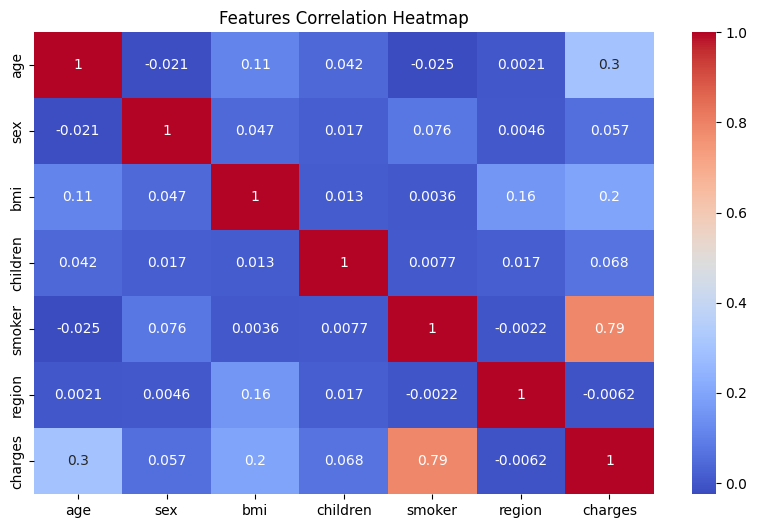

In [ ]:
# Check the features relationships

plt.figure(figsize = (10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Features Correlation Heatmap")

**Notice**:
It's clear that for the first `charges` and `smoker` are highly correlated (**Positive High Correlation**) with almost about 0.79.

`age` and `bmi` are having a **Weak Positive Correaltion** with around 0.3 and 0.3.

### **B: Distribution of smoker** - Histogram, and KDEs

Text(0, 0.5, 'Frequency')

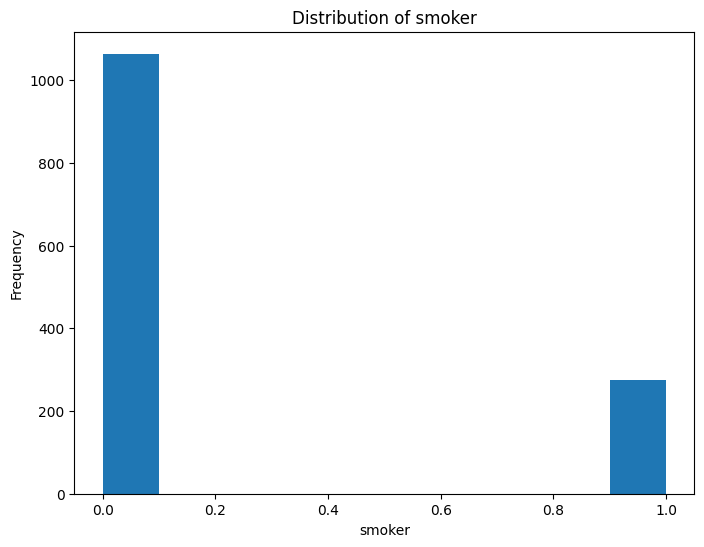

In [ ]:
# A Histogram for charges

plt.figure(figsize = (8,6))
df["smoker"].plot(kind="hist")
plt.title("Distribution of smoker")
plt.xlabel("smoker")
plt.ylabel("Frequency")

**Notice**:
It seems that the `smoker` are accumulating more in 0: non-smokers than 1: smokers, this indicates that our data is `skewed` or `inbalanced`

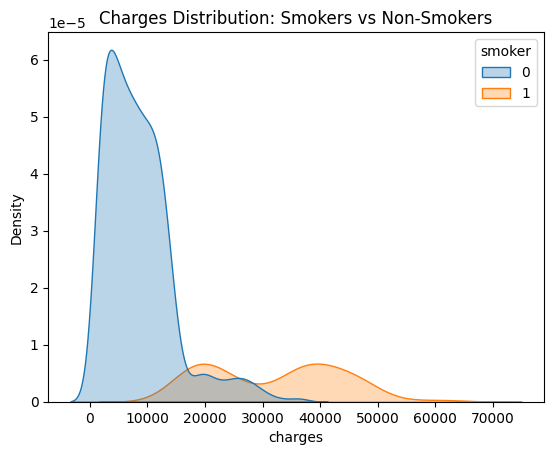

In [ ]:
# KDE for the Charges based on Smokers and Non Smokers

sns.kdeplot(data=df, x="charges", hue="smoker", fill=True, alpha=0.3)
plt.title("Charges Distribution: Smokers vs Non-Smokers")
plt.show()


**Notice**:
As the Hypothesis, the higher the `charges` are are for smokers, but the non smokers people are more than the smokers given the distribution.

Another thing that, `charges` is sometimes very high so `regularization` later when applied will perhaps compensate the high values in the dataset.

### **C: Relation between numerical Categories** -

In [ ]:
print(f"The numerical Categories are: {numerical}")

The numerical Categories are: ['age', 'bmi', 'charges']


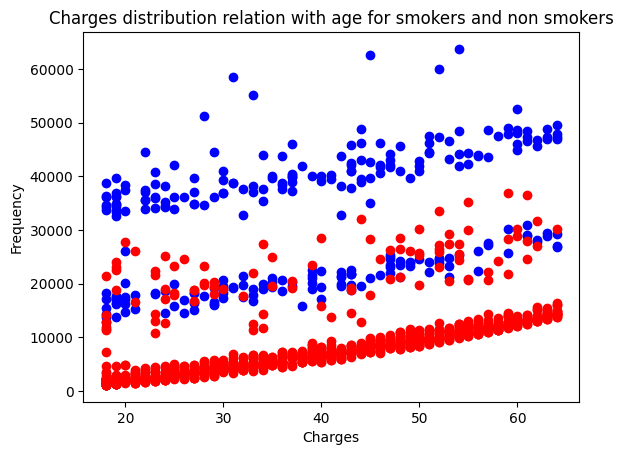

In [ ]:
# The relation between age and charges

df_smoker = df[df["smoker"]== 1]
df_non_smoker = df[df["smoker"]== 0]

plt.scatter(df_smoker["age"], df_smoker["charges"], color="b")
plt.scatter(df_non_smoker["age"], df_non_smoker["charges"], color="r")

plt.title("Charges distribution relation with age for smokers and non smokers")
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.show()


**Notice**: it seems that ages and charges have a linear relation. but seems that there's another factor that is also affecting the trend above! which is `smoker`


In [ ]:
print(df.head())

   age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520


### **D: Percentages of Categorical Features** - Pie Chart
To understand the representation of the data.

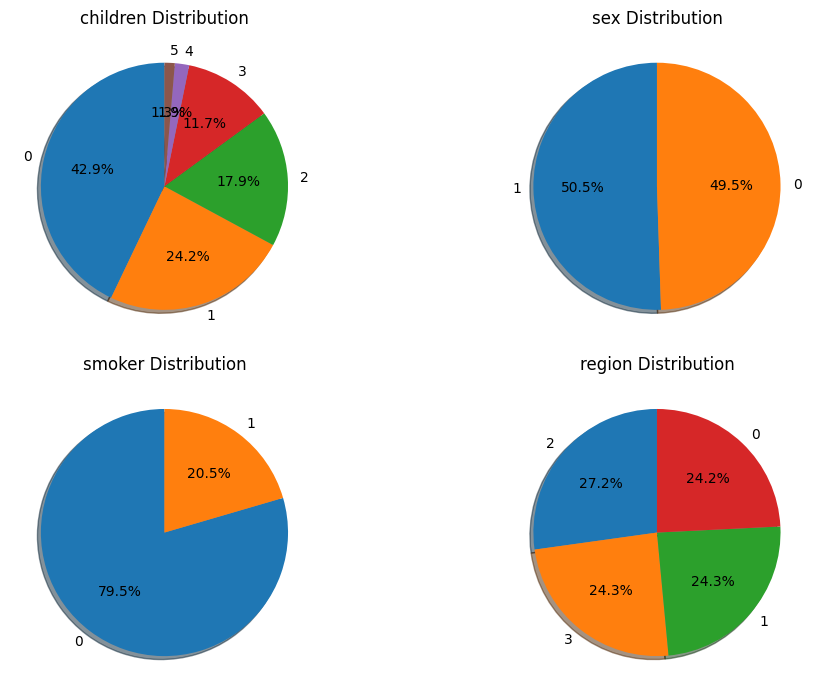

In [ ]:
plt.figure(figsize=(10, 14))

for i, col in enumerate(categorical, 1):
    plt.subplot(4, 2, i)
    df[col].value_counts().plot(
        kind='pie',
        autopct='%1.1f%%',  # show percentages
        startangle=90,      # start the first slice at the top
        shadow=True
    )
    plt.title(f"{col} Distribution")
    plt.ylabel('')  # remove default ylabel for cleanliness

plt.tight_layout()
plt.show()


**Notice**:
The data are almost representative. However, for the `smoker` distribution it seems that this perhaps would cause the model to be biased a bit to 0: Non-smoker, when I build the model for the **Binary Classification** to classify if the individual is a smoker or not!


**Non-smokers** are 79.5% -
**Smokers** are 20.5%


**Solution**: I will be using later is:
* Using 80/20 splits
* Use class weights first using `LogisticRegression(class_weight='balanced')`
* Evaluate with F1 score and  ROC–AUC, not accuracy.


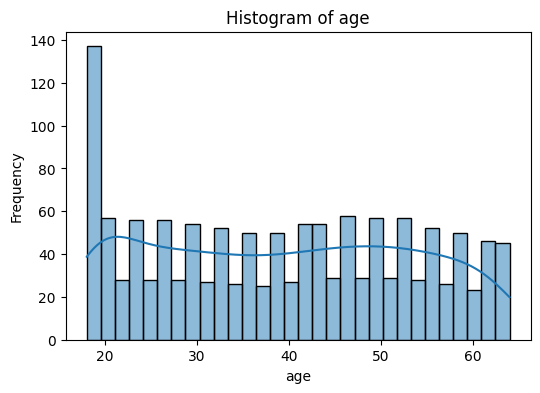

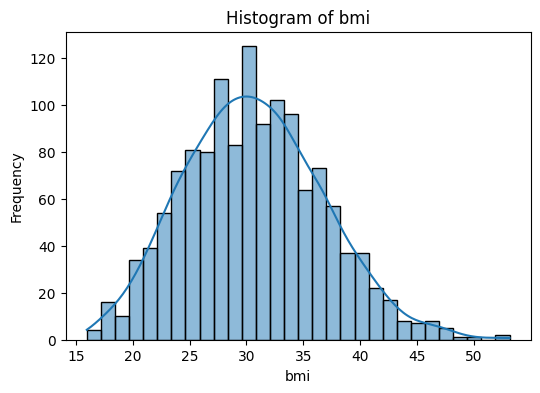

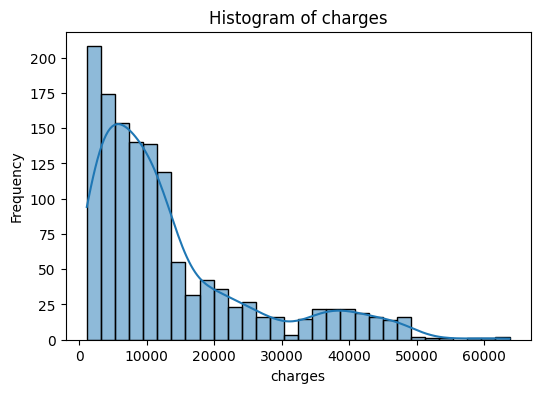

In [ ]:
for col in numerical:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], bins=30, kde=True)  # kde=True adds a smooth curve
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


**Notice**:

* `age` distribution is almost an even distibution
* `bmi` is almost a normal distibtion.
* `charges` is a positive Skewed distribution.

Later, we will **Standerdize** the distribution, cause specially `charges` distribution I find it a troublesome a bit.



## **7- Building the Classification Regression Model**
Build a model that predicts whether an individual is a smoker or not based on the other features.

**Part 1**

* **First Model:** Build a simple classification model using **scikit-learn’s**  library.
* **Second Model:** Build a classification model using k-folds method.
* Analyze  how  the  model  performs  and  what patterns it may be capturing in both.

**Part 2**

Further imporvements for the classification model using:
* **Third Model:** fixing the imbalanced `smoker` distribution through `RandomOverSampler`.
* **Fourth Model:** Regularization applied using Grid Search.
* **Fifth Model:** applying `AdaBoost` to enhance the performance.



### **Part 1**

### **First Model:** Build a simple classification model using **scikit-learn’s**  library.


##### Spliting the data

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [ ]:
X = df.drop("smoker", axis=1).values
y = df["smoker"].values

In [ ]:
print(f"The shape of X is {X.shape} and the shape of y is {y.shape}")

The shape of X is (1338, 6) and the shape of y is (1338,)


In [ ]:
X, y

(array([[1.90000000e+01, 0.00000000e+00, 2.79000000e+01, 0.00000000e+00,
         3.00000000e+00, 1.68849240e+04],
        [1.80000000e+01, 1.00000000e+00, 3.37700000e+01, 1.00000000e+00,
         2.00000000e+00, 1.72555230e+03],
        [2.80000000e+01, 1.00000000e+00, 3.30000000e+01, 3.00000000e+00,
         2.00000000e+00, 4.44946200e+03],
        ...,
        [1.80000000e+01, 0.00000000e+00, 3.68500000e+01, 0.00000000e+00,
         2.00000000e+00, 1.62983350e+03],
        [2.10000000e+01, 0.00000000e+00, 2.58000000e+01, 0.00000000e+00,
         3.00000000e+00, 2.00794500e+03],
        [6.10000000e+01, 0.00000000e+00, 2.90700000e+01, 0.00000000e+00,
         1.00000000e+00, 2.91413603e+04]]),
 array([1, 0, 0, ..., 0, 0, 1]))

##### Standerdizing the datasets and splitting the dataset

In [ ]:
# Splitting the dataset into train_test_split parts
X_model1_train, X_model1_test, y_model1_train, y_model1_test = train_test_split(X,
                                                                    y,
                                                                    test_size = 0.2,
                                                                    random_state=42)

In [ ]:
X_model1_train, X_model1_test, y_model1_train, y_model1_test

(array([[4.60000000e+01, 0.00000000e+00, 1.99500000e+01, 2.00000000e+00,
         1.00000000e+00, 9.19383850e+03],
        [4.70000000e+01, 0.00000000e+00, 2.43200000e+01, 0.00000000e+00,
         0.00000000e+00, 8.53467180e+03],
        [5.20000000e+01, 0.00000000e+00, 2.48600000e+01, 0.00000000e+00,
         2.00000000e+00, 2.71179938e+04],
        ...,
        [5.80000000e+01, 1.00000000e+00, 2.51750000e+01, 0.00000000e+00,
         0.00000000e+00, 1.19311252e+04],
        [3.70000000e+01, 0.00000000e+00, 4.76000000e+01, 2.00000000e+00,
         3.00000000e+00, 4.61135110e+04],
        [5.50000000e+01, 1.00000000e+00, 2.99000000e+01, 0.00000000e+00,
         3.00000000e+00, 1.02146360e+04]]),
 array([[4.50000000e+01, 0.00000000e+00, 2.51750000e+01, 2.00000000e+00,
         0.00000000e+00, 9.09506825e+03],
        [3.60000000e+01, 0.00000000e+00, 3.00200000e+01, 0.00000000e+00,
         1.00000000e+00, 5.27217580e+03],
        [6.40000000e+01, 0.00000000e+00, 2.68850000e+01, 0.000000

In [ ]:
scaler = StandardScaler()
X_model1_train_scaled = scaler.fit_transform(X_model1_train)
X_model1_test_scaled = scaler.fit_transform(X_model1_test)

In [ ]:
X_model1_train_scaled, X_model1_train_scaled

(array([[ 0.47222651, -1.0246016 , -1.75811181,  0.73433626, -0.45611589,
         -0.3456208 ],
        [ 0.54331294, -1.0246016 , -1.03413036, -0.91119211, -1.35325561,
         -0.40048783],
        [ 0.8987451 , -1.0246016 , -0.94466813, -0.91119211,  0.44102382,
          1.14633152],
        ...,
        [ 1.3252637 ,  0.97598911, -0.89248182, -0.91119211, -1.35325561,
         -0.11777735],
        [-0.16755139, -1.0246016 ,  2.82268612,  0.73433626,  1.33816354,
          2.72746075],
        [ 1.1120044 ,  0.97598911, -0.10968724, -0.91119211,  1.33816354,
         -0.26065271]]),
 array([[ 0.47222651, -1.0246016 , -1.75811181,  0.73433626, -0.45611589,
         -0.3456208 ],
        [ 0.54331294, -1.0246016 , -1.03413036, -0.91119211, -1.35325561,
         -0.40048783],
        [ 0.8987451 , -1.0246016 , -0.94466813, -0.91119211,  0.44102382,
          1.14633152],
        ...,
        [ 1.3252637 ,  0.97598911, -0.89248182, -0.91119211, -1.35325561,
         -0.11777735],
  

##### Training the Logistic Regresion

In [ ]:
model1 = LogisticRegression()
model1.fit(X_model1_train_scaled, y_model1_train)


LogisticRegression()

In [ ]:
y_pred_model1 = model1.predict(X_model1_test_scaled)

In [ ]:
y_pred_model1

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0])

In [ ]:
# Evaluating the Classification Model

print("Results for Model 1 (Simple classification model using scikit-learn’s library, normal train_test_split, standerdization) ")
print("===============")
print("Accuracy:", accuracy_score(y_model1_test, y_pred_model1))
print("Recal Score:", recall_score(y_model1_test, y_pred_model1))
print("Precision Score:", precision_score(y_model1_test, y_pred_model1))
print("F1 Score:", f1_score(y_model1_test, y_pred_model1))
print("===============")
print("Classification Report: \n", classification_report(y_model1_test, y_pred_model1))


Results for Model 1 (Simple classification model using scikit-learn’s library, normal train_test_split, standerdization) 
Accuracy: 0.9701492537313433
Recal Score: 0.9629629629629629
Precision Score: 0.896551724137931
F1 Score: 0.9285714285714286
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       214
           1       0.90      0.96      0.93        54

    accuracy                           0.97       268
   macro avg       0.94      0.97      0.95       268
weighted avg       0.97      0.97      0.97       268



**Model1 Commenting in the results**

Despite the class imbalance, the model maintains strong performance on the minority class, as evidenced by a `recall`: 0.96 and an `F1-score`: 0.93.

### **Second Model:** Build a classification model using k-folds method

In here, I will build a pipeline that will first will standerdize each training fold and then train the standerdized datset on a LogisticRegression Model.

I will do a pipleline to prevent dataleakage.


 For my reference:

 The `'scoring'` parameter of cross_val_score must be a str among {'rand_score', 'neg_mean_poisson_deviance', 'precision_micro', 'jaccard_macro', 'neg_mean_absolute_percentage_error', 'neg_mean_absolute_error', 'neg_median_absolute_error', 'neg_mean_squared_error', 'recall_macro', 'completeness_score', 'adjusted_mutual_info_score', 'positive_likelihood_ratio', 'f1_macro', 'mutual_info_score', 'neg_root_mean_squared_log_error', 'f1_samples', 'precision_weighted', 'top_k_accuracy', 'neg_max_error', 'd2_absolute_error_score', 'homogeneity_score', 'matthews_corrcoef', 'recall_samples', 'jaccard_samples', 'precision_macro', 'roc_auc_ovo', 'v_measure_score', 'adjusted_rand_score', 'neg_mean_squared_log_error', 'recall', 'precision_samples', 'roc_auc_ovr_weighted', 'accuracy', 'explained_variance', 'recall_weighted', 'normalized_mutual_info_score', 'f1', 'roc_auc_ovo_weighted', 'jaccard', 'neg_log_loss', 'precision', 'roc_auc', 'balanced_accuracy', 'f1_weighted', 'fowlkes_mallows_score', 'jaccard_weighted', 'neg_root_mean_squared_error', 'recall_micro', 'average_precision', 'neg_mean_gamma_deviance', 'neg_negative_likelihood_ratio', 'jaccard_micro', 'f1_micro', 'neg_brier_score', 'r2', 'roc_auc_ovr'}

In [ ]:
# Creating the pipeline

pipe_model2 = Pipeline([('scaler_model2', StandardScaler()),
                        ('model2', LogisticRegression())])


metrics = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']


print("Results for Model 2 (Build a classification model using k-folds method using scikit-learn’s library using a pipeline to standerdize and train) ")
print("===============")
for m in metrics:
    scores_2 = cross_val_score(pipe_model2,
                             X,
                             y,
                             cv=5,
                             scoring=m)

    print(f"{m}: {scores_2} | mean: {scores_2.mean():.3f}")


Results for Model 2 (Build a classification model using k-folds method using scikit-learn’s library using a pipeline to standerdize and train) 
accuracy: [0.96268657 0.94776119 0.95895522 0.95505618 0.95505618] | mean: 0.956
precision_macro: [0.92959531 0.9027662  0.95165138 0.91894795 0.93564401] | mean: 0.928
recall_macro: [0.96303884 0.95364917 0.92023047 0.95150086 0.9234481 ] | mean: 0.942
f1_macro: [0.94499179 0.92483974 0.93485803 0.9339218  0.92937753] | mean: 0.934


### Comparison of Model 1 vs Model 2

| Metric     | Model 1 (Train-Test Split) | Model 2 (5-Fold Cross-Validation) |
|-----------|---------------------------|----------------------------------|
| Accuracy  | 0.970                     | 0.956                            |
| Precision | 0.897                     | 0.928                            |
| Recall    | 0.963                     | 0.942                            |
| F1 Score  | 0.929                     | 0.934                            |

**Explanation of differences:**

- **Model 1 (Train-Test Split):**  
  1.  Trains on a single split and evaluates on one test set.  
  2.  Results can be slightly optimistic or pessimistic depending on which samples end up in the test set.  
  3.  Accuracy is slightly higher (97%) because the test split may have been “easier.”  

- **Model 2 (5-Fold Cross-Validation):**  
  1.  Trains and validates on 5 different folds, averaging metrics across all folds.  
  2.  Accuracy is slightly lower (95.6%) because all folds, including harder subsets, are evaluated.  
  3. Precision and recall are more balanced across classes due to averaging, giving a more robust estimate of model performance.  

**Key Takeaway:**  
> Cross-validation (Model 2) provides a **more reliable and generalizable estimate** of performance, while a single train-test split (Model 1) may give a slightly skewed snapshot.



### **Part 2**
Further imporvements for the classification model
### **Third Model:** fixing the imbalanced `smoker` distribution through `RandomOverSampler` and then apply the same techqnique in Model2

In [ ]:
df["smoker"].value_counts()

,count
smoker,
0,1064
1,274


**Notice:** It's clear since the first EDA that the dataset is imbalanced when seeing `smoker`

#### Oversampling using `RandomOverSampler`

In [ ]:
from imblearn.over_sampling import RandomOverSampler

over = RandomOverSampler(sampling_strategy=1)

X_new, y_new = over.fit_resample(X, y)

In [ ]:
X_new.shape, X.shape

((2128, 6), (1338, 6))

In [ ]:
# Creating the pipeline

pipe_model3 = Pipeline([('scaler_model3', StandardScaler()),
                        ('model3', LogisticRegression())])


metrics = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']


print("Results for Model 3 (fixing the imbalanced `smoker` distribution through `RandomOverSampler` and then apply the same techqnique in Model2) ")
print("===============")
for m in metrics:
    scores_3 = cross_val_score(pipe_model3,
                             X_new,
                             y_new,
                             cv=5,
                             scoring=m)

    print(f"{m}: {scores_3} | mean: {scores_3.mean():.3f}")


Results for Model 3 (fixing the imbalanced `smoker` distribution through `RandomOverSampler` and then apply the same techqnique in Model2) 
accuracy: [0.97652582 0.96478873 0.98591549 0.97176471 0.98352941] | mean: 0.977
precision_macro: [0.97757848 0.96710526 0.98630137 0.97333333 0.98401826] | mean: 0.978
recall_macro: [0.97652582 0.96478873 0.98591549 0.97169811 0.98356808] | mean: 0.976
f1_macro: [0.97651288 0.96474502 0.9859127  0.97173826 0.98352613] | mean: 0.976


### Comparison of Model 2 vs Model 3
| Metric     | Model 1 (Train-Test Split) | Model 2 (5-Fold Cross-Validation) | Model 3 (Imbalanced fixed 5-fold CV) |
|-----------|----------|--------------| ------------------------|
| Accuracy  | 0.970    | 0.956        | 0.976                   |
| Precision | 0.897    | 0.928        |0.977                    |
| Recall    | 0.963    | 0.942        |0.976                    |
| F1 Score  | 0.929    | 0.934        |0.976.                   |


**Key Takeaway**


> Applying `RandomOverSampler` to address the class imbalance in the smoker variable improved both overall and per-class performance. The model’s macro F1-score increased from 0.934 in `model2` to 0.976, indicating a more balanced classification across both classes. Cross-validation confirms stability and generalization of the model after oversampling.

### **Fourth Model:** Regularization applied using Grid Search.

In [ ]:
from sklearn.model_selection import cross_val_predict

pipe_model4 = Pipeline([('scaler_model4', StandardScaler()),
                        ('model4', LogisticRegression())])

param_grid = {
    'model4__C': [0.01, 0.1, 1, 10, 100],      # Smaller: stronger regularization
    'model4__penalty': ['l1', 'l2'],
    'model4__solver': ['liblinear']
}

grid_search = GridSearchCV(estimator=pipe_model4,
                           param_grid=param_grid,
                           cv=5,                     # 5-fold cross-validation
                           scoring='f1_macro',       # Optimize for balanced F1 across classes
)

grid_search.fit(X_new, y_new)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_


y_pred_model4 = cross_val_predict(best_model,
                           X_new,
                           y_new,
                           cv=5)

print("Results for Model 4 (Regularization applied using Grid Search)")
print("===============")
print("The best parameters after the GridSearchCV for the Logistic Regression Model are")
print(best_params)
print("===============")


print(f"Accuracy: {accuracy_score(y_new, y_pred_model4):.3f}")
print(f"Precision (macro): {precision_score(y_new, y_pred_model4, average='macro'):.3f}")
print(f"Recall (macro): {recall_score(y_new, y_pred_model4, average='macro'):.3f}")
print(f"F1 (macro): {f1_score(y_new, y_pred_model4, average='macro'):.3f}")


Results for Model 4 (Regularization applied using Grid Search)
The best parameters after the GridSearchCV for the Logistic Regression Model are
{'model4__C': 10, 'model4__penalty': 'l1', 'model4__solver': 'liblinear'}
Accuracy: 0.978
Precision (macro): 0.979
Recall (macro): 0.978
F1 (macro): 0.978


### Comparison of Model 3 vs Model 4
| Metric     | Model 1 (Train-Test Split) | Model 2 (5-Fold Cross-Validation) | Model 3 (Imbalanced fixed 5-fold CV) | Model 4 (Regularization)
|-----------|----------|--------------| ------------------------|--------------|
| Accuracy  | 0.970    | 0.956        | 0.976                   | 0.978
| Precision | 0.897    | 0.928        |0.977                    | 0.979
| Recall    | 0.963    | 0.942        |0.976                    | 0.978
| F1 Score  | 0.929    | 0.934        |0.976.                   | 0.978


**Key Takeaways**

> There is a slight change for this Model performance.

### **Fifth Model:** applying `AdaBoost` to enhance the performance.

In [ ]:
pipe_model5 = Pipeline([('scaler_model4', StandardScaler()),
                        ('clf', AdaBoostClassifier(n_estimators=1000,   # number of weak learners
                                                   learning_rate=0.1,
                                                   random_state=42))
                        ])



y_pred_model5 = cross_val_predict(pipe_model5, X_new, y_new, cv=5)

print("Results for Model 5 (AdaBoost)")
print("===============")
print(f"Accuracy: {accuracy_score(y_new, y_pred_model5):.3f}")
print(f"Precision (macro): {precision_score(y_new, y_pred_model5, average='macro'):.3f}")
print(f"Recall (macro): {recall_score(y_new, y_pred_model5, average='macro'):.3f}")
print(f"F1 (macro): {f1_score(y_new, y_pred_model5, average='macro'):.3f}")


Results for Model 5 (AdaBoost)
Accuracy: 0.976
Precision (macro): 0.977
Recall (macro): 0.976
F1 (macro): 0.976


### Comparison of Model 4 vs Model 5
| Metric     | Model 1 (Train-Test Split) | Model 2 (5-Fold Cross-Validation) | Model 3 (Imbalanced fixed 5-fold CV) | Model 4 (Regularization) | Model 5(AdaBoost) |
|-----------|----------|--------------| ---------|--------------|-----------|
| Accuracy  | 0.970    | 0.956        | 0.976    | 0.978        | 0.976
| Precision | 0.897    | 0.928        |0.977     | 0.979        | 0.977
| Recall    | 0.963    | 0.942        |0.976     | 0.978        | 0.976
| F1 Score  | 0.929    | 0.934        |0.976.    | 0.978        | 0.976


**Key Takeaways**

> For the Adaboost Model, the more n_estimators we have the more accurate results, we will get.
However, it's slower than Model_4.

`AdaBoost` (Model 5) is slightly stronger numerically, but the improvement is marginal and comes at the cost of complexity.

### **Final Model Preference based on Performance**

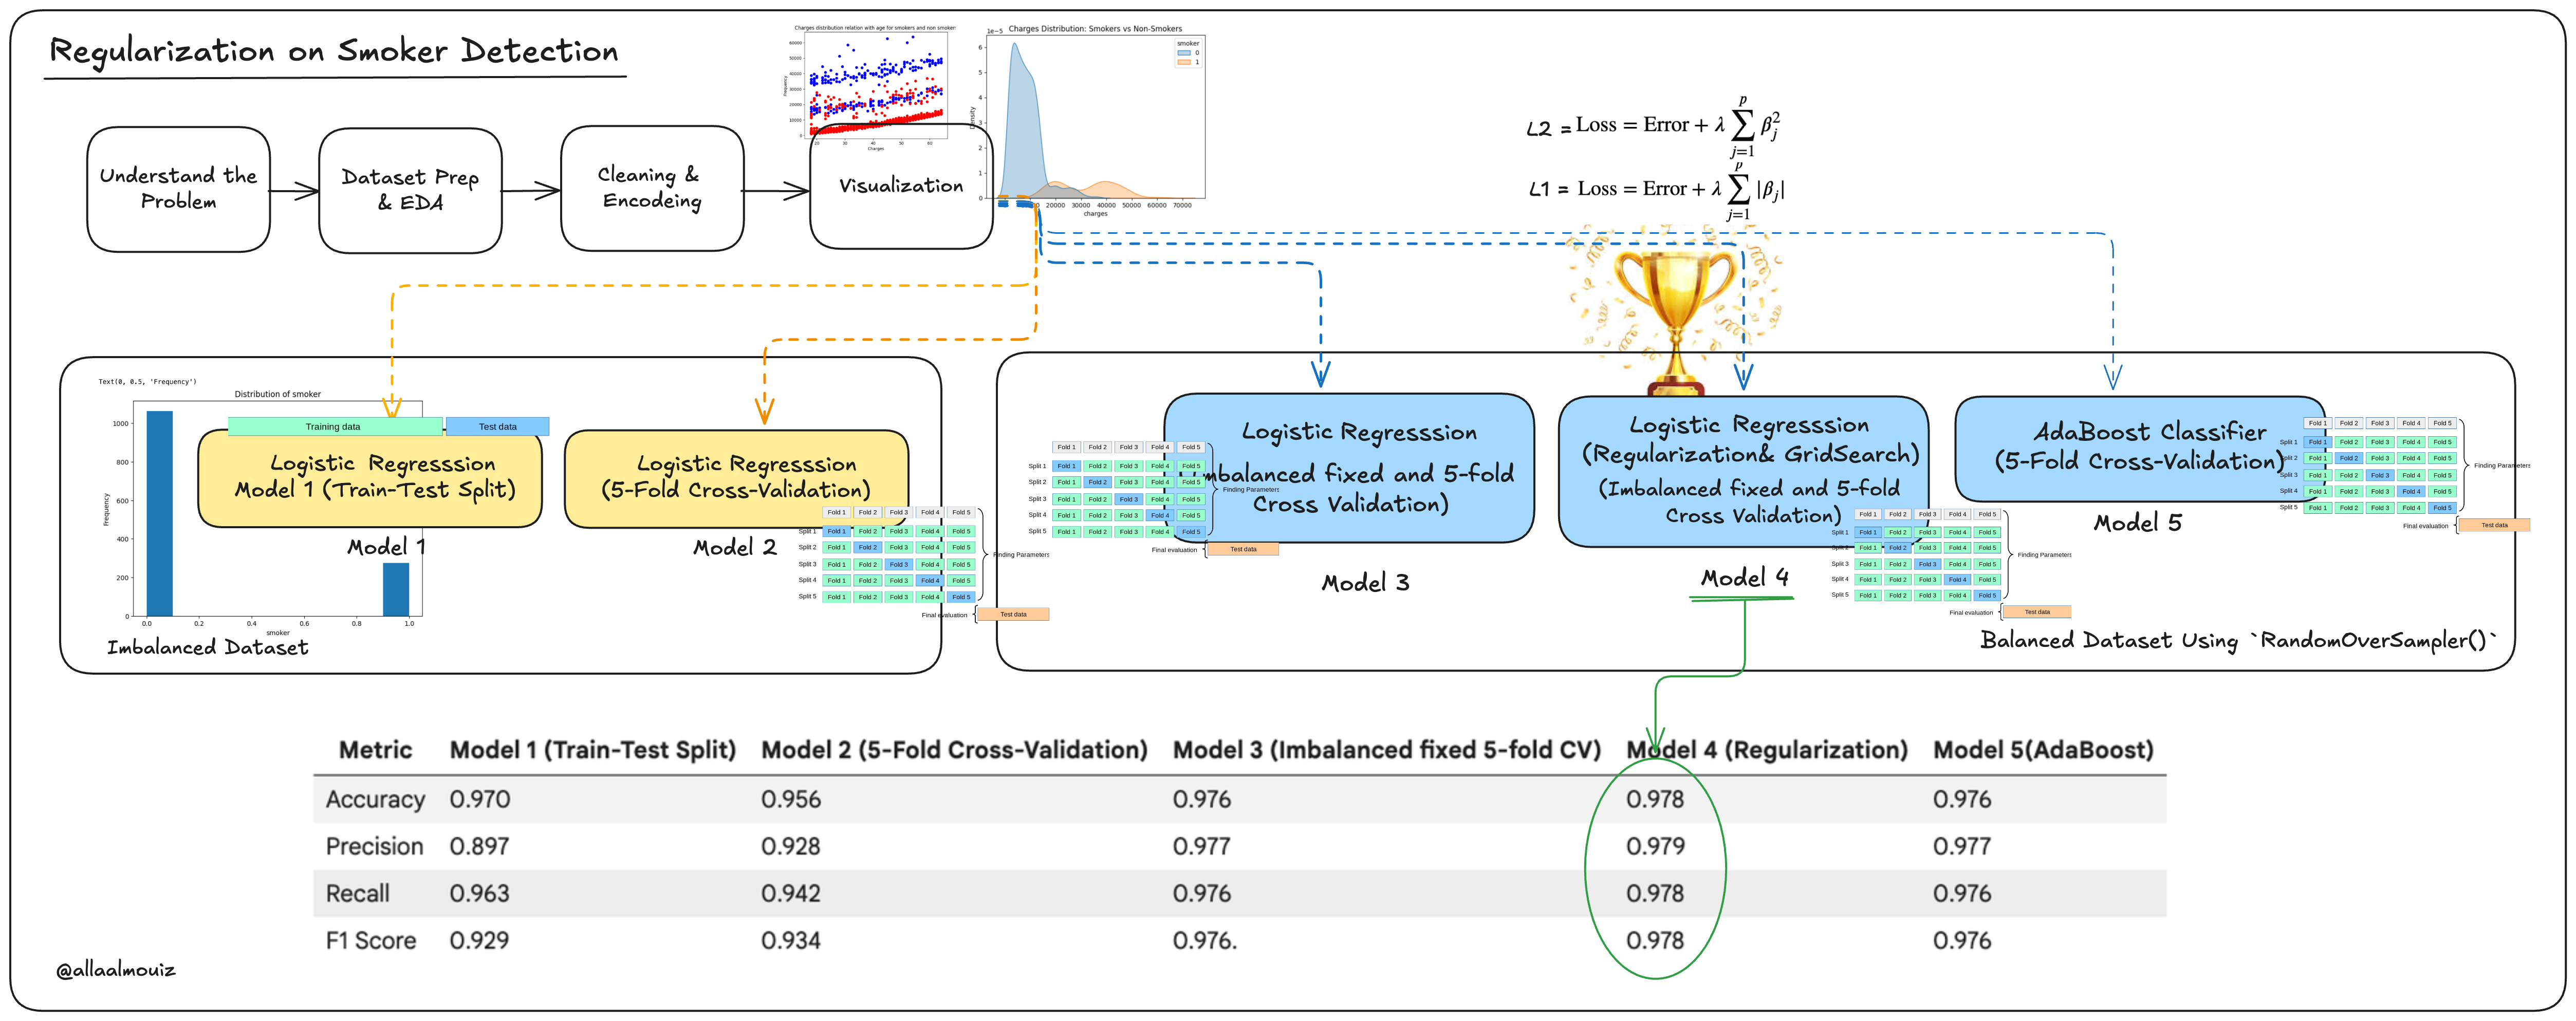

I see that **`Model 4`** offers the best trade-off between high **performance**, and **complexity**.

As Regularization was applied using Grid Search, and the imbalance in the dataset was fixed with `RandomOverSampler`. This enhanced the performance.


***For most practical purposes, Model 4 is the recommended choice.***